In [0]:
![Quora-1.png](attachment:Quora-1.png)

/bin/bash: -c: line 0: syntax error near unexpected token `attachment:Quora-1.png'
/bin/bash: -c: line 0: `[Quora-1.png](attachment:Quora-1.png)'


# **Quora Question Pairs**

# **1. Business Problem**

## ***1.1 Description ***

Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.

Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.


Credits: Kaggle

---



### **Problem Statement**

* Identify which questions asked on Quora are duplicates of questions that has

already been asked.

* This could be useful to instantly provide answers to questions that have already been answered.

* We are tasked with predicting whether a pair of questions are duplicates or not.








### **1.2 Sources/Useful Links**

* Source : https://www.kaggle.com/c/quora-question-pairs

### **Useful Links**

* Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments

* Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0

* Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning

* Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30


### ***1.3 Real world/Business Objectives and Constraints ***

1. The cost of a mis-classification can be very high.

2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.

3. No strict latency concerns.

4. Interpretability is partially important.

# **2. Machine Learning Probelm**

# **2.1 Data**

## **2.1.1 Data Overview**

- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290

## **2.1.2 Example Data point **

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

# **<h2> 2.2 Mapping the real world problem to an ML problem </h2>**

### **2.2.1 Type of Machine Leaning Problem **

It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not.

### **2.2.2 Performance Metric **

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

# **2.3 Train and Test Construction**

 We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

# **Approch method**

https://classroom.appliedcourse.com/classrooms/e69a594E/assignments/aDAGp7Bj/

https://github.com/krpiyush5/Quora-Question-Pair-Similarity-Problem-/blob/
master/final_update_QuoraQuestionPair.ipynb

https://www.appliedaicourse.com/


**Procedure**

1) First we have to perform  Exploratory Data Analysis on Quora Question Pair data in which we  going perform such as finding number of different questions, checking for duplicates, number of occurence of questions etc.

2) Then we will perform some feature extraction like fuzz ratio, fuzz partial ration, longest common substring etc.

3) After performing feature extraction we will apply some visualisation techniques such as pair-plot, violin plot, TSNE etc. 

4) Then we going to peform tfidf-w2vec vectorizer on pair of questions dataset and then we merge each tfidf-w2vec vectors to our advanced featured vectors.

5) In the next step we will apply some machine learning algorithm such as logistic regression, support vector machines etc and found log-loss for both train and test dataset.

6) After choosing best parameters we then plot confusion matrix, precision matrix and recall matrix for each one.

7) we will perform  same process for tfidf vectorizer at the end of this project

# **3. Exploratory Data Analysis**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
pip install distance

     |████████████████████████████████| 184kB 3.4MB/s 
  Created wheel for distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=dc7612e1887f28124f165822e67e7f93aafea095eea07f9e4d635da19a468a42
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built distance


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

## **3.1 Reading data and basic stats**

In [4]:
df = pd.read_csv("/content/drive/My Drive/Quora/train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 404290


In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

### **3.2.1 Distribution of data points among output classes**

- Number of duplicate(smilar) and non-duplicate(non similar) questions

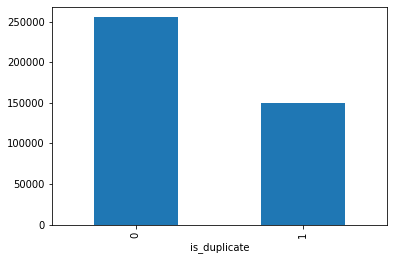

In [7]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [8]:
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

~> Total number of question pairs for training:
   404290


In [9]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


### **3.2.2 Number of unique questions**

In [10]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



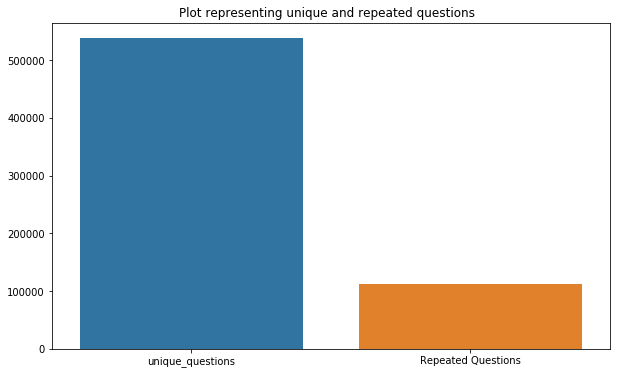

In [11]:

x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

### **3.2.3 Checking for Duplicates**

In [12]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


### **3.2.4 Number of occurrences of each question**

Maximum number of times a single question is repeated: 157



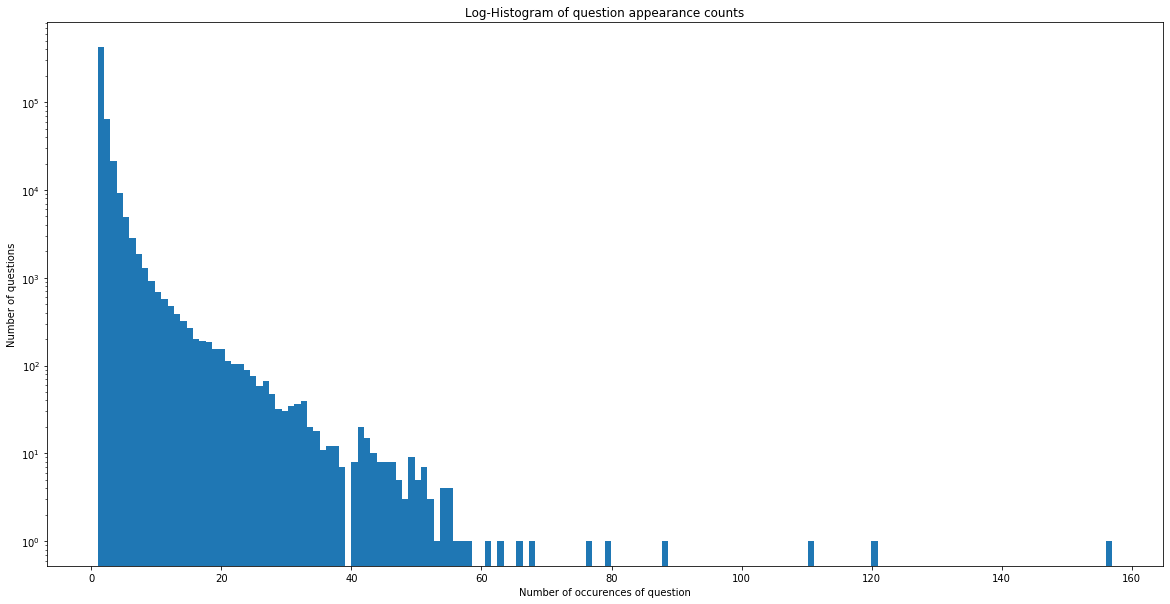

In [13]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))

### **3.2.5 Checking for NULL values **

In [14]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]


- There are two rows with null values in question2 ###

In [15]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


# **3.3 Basic Feature Extraction (before cleaning) **

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [16]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


### **3.3.1 Analysis of some of the extracted features**
- Here are some questions have only one single words.

In [17]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


**3.3.1.1 Feature: word_share **

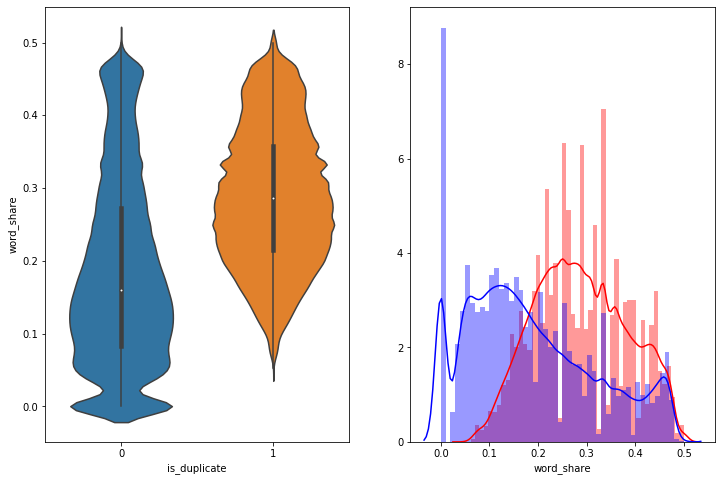

In [18]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

### **3.3.1.2 Feature: word_Common**

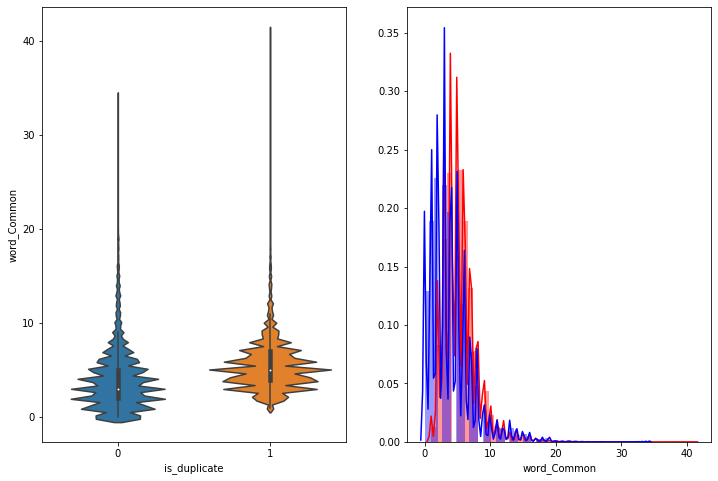

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

The distributions of the word_Common feature in similar and non-similar questions are highly overlapping

## **1.2.1 : EDA: Advanced Feature Extraction.**

In [20]:
pip install fuzzywuzzy

In [21]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

In [0]:
#https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [23]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


## **3.4 Preprocessing of Text**

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

# **3.5 Advanced Feature Extraction (NLP and Fuzzy Features)**

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [0]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [27]:
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("/content/drive/My Drive/Quora/nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("/content/drive/My Drive/Quora/train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)

Extracting features for train:
token features...
fuzzy features..


### **3.5.1 Analysis of extracted features**

**3.5.1.1 Plotting Word clouds**

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [28]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [29]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 33193067


**Word Clouds generated from duplicate pair question's text**

Word Cloud for Duplicate Question pairs


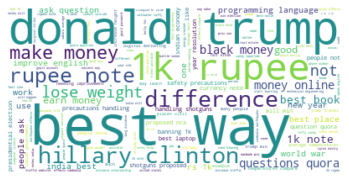

In [30]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word Clouds generated from non duplicate pair question's text**

Word Cloud for non-Duplicate Question pairs:


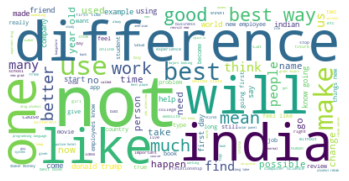

In [31]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] **

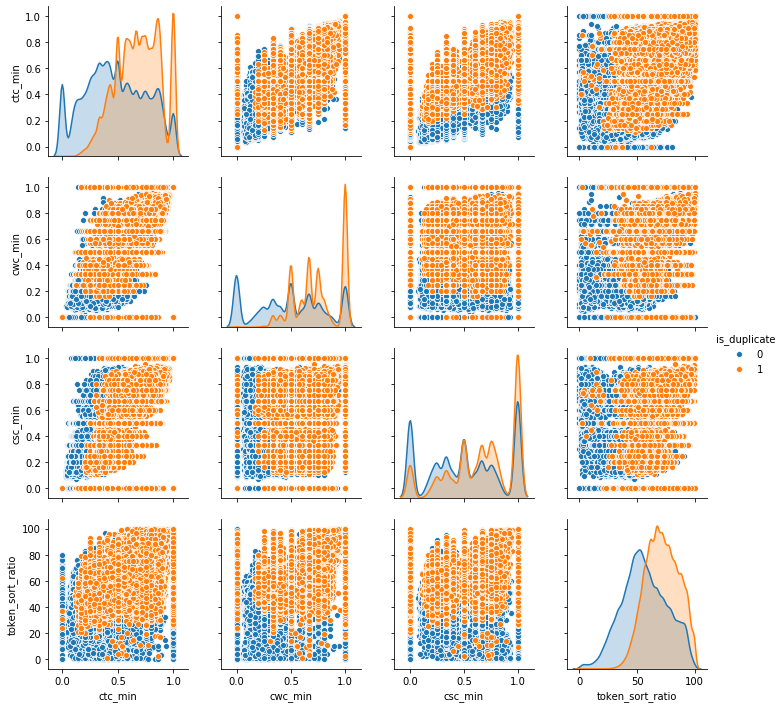

In [32]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

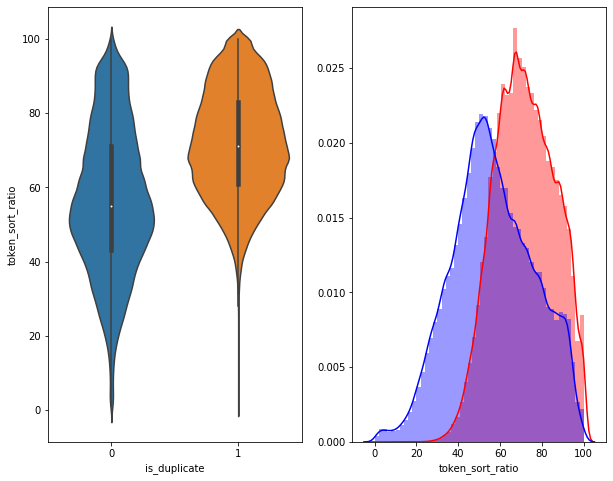

In [33]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

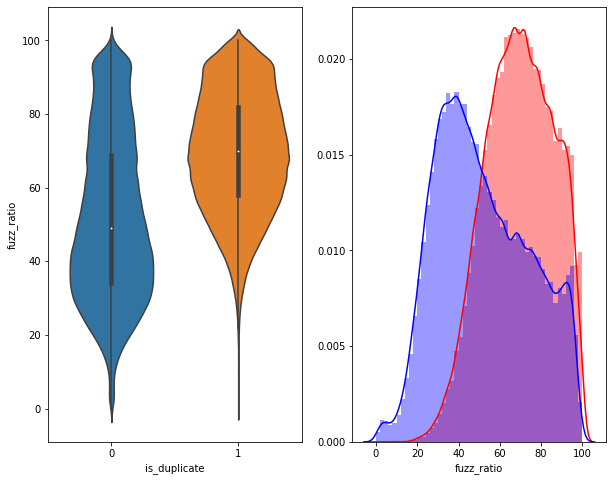

In [34]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

## **3.5.2 Visualization **

In [0]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [36]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.017s...
[t-SNE] Computed neighbors for 5000 samples in 0.383s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.307s
[t-SNE] Iteration 50: error = 81.3444061, gradient norm = 0.0466835 (50 iterations in 0.853s)
[t-SNE] Iteration 100: error = 70.6514587, gradient norm = 0.0087385 (50 iterations in 0.577s)
[t-SNE] Iteration 150: error = 68.9513702, gradient norm = 0.0055224 (50 iterations in 0.579s)
[t-SNE] Iteration 200: error = 68.1304703, gradient norm = 0.0044136 (50 iterations in 0.558s)
[t-SNE] Iteration 250: error = 67.6240921, gradient norm = 0.0040027

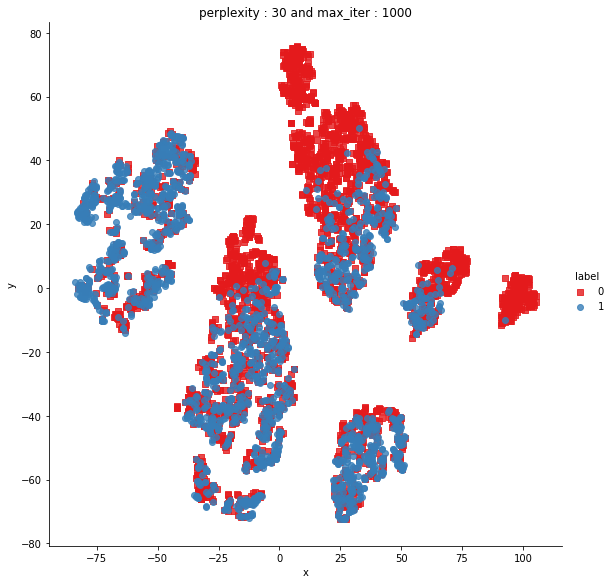

In [37]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [38]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.020s...
[t-SNE] Computed neighbors for 5000 samples in 0.488s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.307s
[t-SNE] Iteration 50: error = 80.5759201, gradient norm = 0.0296225 (50 iterations in 1.594s)
[t-SNE] Iteration 100: error = 69.4207993, gradient norm = 0.0039939 (50 iterations in 0.952s)
[t-SNE] Iteration 150: error = 68.0063019, gradient norm = 0.0017368 (50 iterations in 0.891s)
[t-SNE] Iteration 200: error = 67.4468231, gradient norm = 0.0010927 (50 iterations in 0.892s)
[t-SNE] Iteration 250: error = 67.1332855, gradient norm = 0.0009538

In [39]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [40]:
#(Q) What are the column names in our dataset?
print (df.columns)

Index(['x', 'y', 'label'], dtype='object')


# **3.6 Featurizing text data with tfidf weighted word-vectors**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

In [0]:
# avoid decoding problems
df = pd.read_csv("/content/drive/My Drive/Quora/train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [117]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("/content/drive/My Drive/Quora/nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("/content/drive/My Drive/Quora/df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [119]:
dfnlp.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [0]:
df1  = dfnlp.merge(dfppro, on='id',how='left')

In [0]:
df1 = df1.drop(['qid1_x','qid2_x'],axis=1)
# df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [122]:

df1.shape

(404290, 35)

In [0]:
df4  = df1.merge(df3, on='id',how='left')

In [0]:
df4 = df4.sample(n=50000)

In [125]:
df4.shape

(50000, 35)

In [126]:
y_true = df4['is_duplicate_x']
y_true

45685     0
178478    0
298445    1
218754    0
99492     0
         ..
41415     1
285519    1
188838    0
43022     0
316181    1
Name: is_duplicate_x, Length: 50000, dtype: int64

In [127]:
df4 = df4.drop(['is_duplicate_x'],axis=1)
df4.shape

(50000, 34)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [0]:
X_train,X_test, y_train, y_test = train_test_split(df4, y_true, stratify=y_true, test_size=0.3)

In [130]:
X_train.shape


(35000, 34)

In [131]:
X_test.shape

(15000, 34)

In [132]:
X_train.shape[0] + X_test.shape[0]

50000

In [133]:

# Filling the null values with ' '
X_train = X_train.fillna(' ')
nan_rows1 = X_train[X_train.isnull().any(1)]
print (nan_rows1)

# Filling the null values with ' '
X_test = X_test.fillna(' ')
nan_rows2 = X_test[X_test.isnull().any(1)]
print (nan_rows2)

Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+q2, freq_q1-q2]
Index: []
Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+q2, freq_q1-q2]
Index: []


## **TFIDF W@V VEctorization**

In [60]:
X_train['question1_x'].isnull().values.any()

False

In [61]:
X_train[X_train.isnull().any(1)]

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,qid1_y,qid2_y,question1_y,question2_y,is_duplicate_y,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions_train = list(X_train['question1_x']) + list(X_train['question2_x'])

tfidf_train = TfidfVectorizer(lowercase=False, )
tfidf_train.fit_transform(questions_train)

# # dict key:word and value:tf-idf score
word2tfidf_train = dict(zip(tfidf_train.get_feature_names(), tfidf_train.idf_))

In [63]:

(X_train['question1_x'][12980:12995])

240103    what is the difference between ibuprofen  advi...
81247     if one person watches the same youtube video t...
341880    if my life had absolutely no limits and i coul...
113312    what is the clearest and most concise way to d...
312854                    what is the benefit using rankle 
157461                         do earbuds cause ear cancer 
386594    why do i feel physcially agitated when my spac...
229861    we all know that an oscillating electric field...
337673    what is it like to study in soka university of...
319215       how do women own feet and men own feet differ 
54435              what incident changed your life forever 
76537         what does it feel like to awaken from a coma 
58543     harvard college courses  what is general shopp...
346380    what is the body that governs sports in the uk...
51755     what do flipkart own delivery boys look for wh...
Name: question1_x, dtype: object

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
from scipy.sparse import hstack
import numpy as np
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm1

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy
from sklearn.model_selection import train_test_split

In [67]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm1(list(X_train['question1_x'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf_train[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_train['q1_feats_m'] = list(vecs1)

In [68]:
vecs2 = []
for qu2 in tqdm1(list(X_train['question2_x'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf_train[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_train['q2_feats_m'] = list(vecs2)

In [0]:
# # storing the final features to csv file
# if not os.path.isfile('X_train.csv'):
#     result1  = X_train
#     result1.to_csv('X_train.csv')
# # storing the final features to csv file
# if not os.path.isfile('y_train.csv'):
#     result2  = y_train
#     result2.to_csv('y_train.csv')

In [0]:
X_train_q1 = pd.DataFrame(X_train.q1_feats_m.values.tolist(), index= X_train.index)
X_train_q2 = pd.DataFrame(X_train.q2_feats_m.values.tolist(), index= X_train.index)

In [71]:
X_train.drop(['q1_feats_m','q2_feats_m'],axis=1)

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,qid1_y,qid2_y,question1_y,question2_y,is_duplicate_y,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
328637,328637,how can i motivate myself to do the dishes,how can i motivate myself to,0.999900,0.499975,0.999980,0.714276,0.999983,0.666659,0.0,1.0,3.0,7.5,100,80,80,100,0.966667,455206,449094,How can I motivate myself to do the dishes?,How can I motivate myself to?,0,1,1,43,29,9,6,5.0,15.0,0.333333,2,0
364912,364912,can an award issued by the lok adalat be chall...,what are different kinds of writs issued by th...,0.333328,0.181817,0.333328,0.285710,0.333331,0.210525,0.0,0.0,7.0,15.5,48,38,45,51,0.241935,494991,494992,Can an award issued by the Lok Adalat be chall...,What are different kinds of writs issued by th...,0,1,1,61,111,12,19,3.0,30.0,0.100000,2,0
247166,247166,what are the best ways to inspire people,how do i inspire people,0.999950,0.499988,0.000000,0.000000,0.399992,0.249997,1.0,0.0,3.0,6.5,76,51,60,79,0.640000,360345,360346,What are the best ways to inspire people?,How do I inspire people?,1,1,1,41,24,8,5,2.0,13.0,0.153846,2,0
59960,59960,how much distance do i need to run daily if i ...,how do i lose a minimum of 5kg of weight in ju...,0.333328,0.199998,0.599988,0.428565,0.357140,0.294116,1.0,1.0,3.0,15.5,63,56,48,50,0.105263,104944,97400,How much distance do I need to run daily if I ...,How do I lose a minimum of 5kg of weight in ju...,0,3,7,72,56,17,14,5.0,28.0,0.178571,10,4
66265,66265,were you ever kidnapped by anyone,have you ever been kidnapped what were your e...,0.666644,0.666644,0.666644,0.333328,0.666656,0.444440,0.0,0.0,3.0,7.5,82,57,61,68,0.314286,114880,114881,Were you ever kidnapped by anyone?,Have you ever been kidnapped? What were your e...,1,1,2,34,57,6,9,3.0,15.0,0.200000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360390,360390,how can i stop feeling guilty about everything...,how do i stop feeling guilty over my ex,0.749981,0.428565,0.399992,0.333328,0.555549,0.384612,0.0,1.0,4.0,11.0,78,60,62,78,0.560976,395106,490186,How can I stop feeling guilty about everything...,How do I stop feeling guilty over my ex?,0,1,1,72,40,13,9,5.0,22.0,0.227273,2,0
362307,362307,how does a computer sort data,how do computers sort data,0.666644,0.666644,0.499975,0.333322,0.599988,0.499992,1.0,1.0,1.0,5.5,91,91,91,85,0.392857,492208,492209,How does a computer sort data?,How do computers sort data?,1,1,1,30,27,6,5,3.0,11.0,0.272727,2,0
365712,365712,is it possible for two devices to have the sam...,how can i check if my internet ip address is s...,0.499992,0.428565,0.142855,0.124998,0.307690,0.266665,0.0,0.0,2.0,14.0,56,50,42,49,0.187500,495834,495835,Is it possible for two devices to have the sam...,How can I check if my internet IP address is s...,0,1,3,86,63,15,13,3.0,28.0,0.107143,4,2
13472,13472,how do i explode to the rim in basketball with...,i am going away for my phd studies and i have ...,0.399992,0.166665,0.428565,0.249998,0.416663,0.172413,0.0,0.0,17.0,20.5,59,46,36,49,0.140625,25868,25869,How do I explode to the rim in basketball with...,I am going away for my PhD studies and I have ...,0,1,1,63,142,12,29,4.0,36.0,0.111111,2,0


In [0]:

if (1):
    X_train_q1['id']=X_train['id']
    X_train_q2['id']=X_train['id']
    df1  = X_train_q1.merge(X_train_q2, on='id',how='left')
    X_train  = X_train.merge(df1, on='id',how='left')

In [73]:
X_test['question1_x'].isnull().values.any()

False

In [74]:

X_test[X_test.isnull().any(1)]

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,qid1_y,qid2_y,question1_y,question2_y,is_duplicate_y,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions_test = list(X_test['question1_x']) + list(X_test['question2_x'])

# tfidf_train = TfidfVectorizer(lowercase=False, )
tfidf_train.transform(questions_test)

# # dict key:word and value:tf-idf score
word2tfidf_test = dict(zip(tfidf_train.get_feature_names(), tfidf_train.idf_))

In [76]:
(X_test['question1_x'][12980:12995])

188357                    why did you abandon your parents 
360491    what happens if you travel faster than the spe...
333574    when you hear the word kitchen  what is the fi...
261761    will the value of indian rupee increase after ...
266233    how is careerfoundry different from other onli...
371776    how can i pass the 70 693 exam with a high score 
34459     which is the best place to get repair air cond...
316108                      are dreams alternate realities 
331482             how will a guy know if they like a girl 
36160     is this sentence grammatically correct and mea...
128555          who is the most beautiful actress in china 
75683     why has not aamir khan received even one natio...
21549     i am 33 this year and has 100k in the bank ear...
298021                   what was time before the big bang 
166298    is there any free self editing program for fic...
Name: question1_x, dtype: object

In [77]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm1(list(X_test['question1_x'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf_test[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_test['q1_feats_m'] = list(vecs1)

In [78]:
vecs2 = []
for qu2 in tqdm1(list(X_test['question2_x'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf_test[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_test['q2_feats_m'] = list(vecs2)

In [0]:
# if not os.path.isfile('X_test.csv'):
#     result3  = X_test
#     result3.to_csv('X_test.csv')
# # storing the final features to csv file
# if not os.path.isfile('y_test.csv'):
#     result4  = y_test
#     result4.to_csv('y_test.csv')

In [0]:
X_test_q1 = pd.DataFrame(X_test.q1_feats_m.values.tolist(), index= X_test.index)
X_test_q2 = pd.DataFrame(X_test.q2_feats_m.values.tolist(), index= X_test.index)

In [81]:
X_test.drop(['q1_feats_m','q2_feats_m'],axis=1)

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,qid1_y,qid2_y,question1_y,question2_y,is_duplicate_y,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
71597,71597,what are the pros and cons of keeping to the s...,i want to teach what are the pros and cons,0.499988,0.499988,0.833319,0.714276,0.699993,0.583328,0.0,0.0,2.0,11.0,82,73,52,55,0.600000,123174,123175,What are the pros and cons of keeping to the s...,I want to teach. What are the pros and cons?,0,1,1,58,44,12,10,6.0,21.0,0.285714,2,0
388337,388337,how will a 2 year gap after 12th affect my pla...,is it worth getting into bit sindri after a tw...,0.499992,0.374995,0.399992,0.399992,0.454541,0.357140,0.0,0.0,3.0,12.5,58,55,45,51,0.388889,425356,520715,How will a 2 year gap after 12th affect my pla...,Is it worth getting into BIT Sindri after a tw...,0,2,1,53,68,11,14,4.0,24.0,0.166667,3,1
350012,350012,what will be the effects of an india pakistan ...,what is india own counter strategy for cpec c...,0.749991,0.749991,0.249994,0.142855,0.583328,0.411762,0.0,1.0,5.0,14.5,77,71,63,66,0.437500,332387,478740,What will be the effects of an India-Pakistan ...,What is India's counter strategy for CPEC (Chi...,0,2,1,97,77,16,11,3.0,26.0,0.115385,3,1
371978,371978,do people believe in astrology,how many people believe in astrology,0.999967,0.749981,0.499975,0.499975,0.799984,0.666656,1.0,0.0,1.0,5.5,95,88,88,94,0.906250,380647,502659,Do people believe in astrology?,How many people believe in astrology?,0,2,1,31,37,5,6,4.0,11.0,0.363636,3,1
74958,74958,do obc ncl students have a tuition fee waiver ...,what is this fractal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7.0,7.5,33,33,25,43,0.090909,128359,128360,Do OBC-NCL students have a tuition-fee waiver ...,What is this fractal?,0,1,1,54,21,9,4,0.0,13.0,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199877,199877,what are some most depressing movies yet fair...,what are the most depressing movies of all time,0.666644,0.399992,0.749981,0.499992,0.555549,0.555549,0.0,1.0,0.0,9.0,80,74,79,77,0.510204,256865,280908,"What are some most depressing movies, yet fair...",What are the most depressing movies of all time?,1,2,2,55,48,9,9,4.0,18.0,0.222222,4,0
89325,89325,are we moving closer towards the next world war,how close we are to see 3rd world war,0.399992,0.333328,0.666644,0.499988,0.444440,0.444440,1.0,0.0,0.0,9.0,71,71,60,68,0.282051,34522,48103,Are we moving closer towards the next world war?,How close we are to see 3rd world war?,1,10,6,48,38,9,9,4.0,18.0,0.222222,16,4
65734,65734,where did the civil war begin,when did the civil war begin,0.999967,0.999967,0.666644,0.666644,0.833319,0.833319,1.0,0.0,0.0,6.0,95,95,95,93,0.833333,39203,98489,Where did the Civil War begin?,When did the Civil War begin?,1,2,3,30,29,6,6,5.0,12.0,0.416667,5,1
381216,381216,my iphone 6 is so slow how do i refresh it,why does the iphone 6 feel so slow,0.749981,0.749981,0.249994,0.142855,0.499994,0.363633,0.0,0.0,3.0,9.5,64,53,49,57,0.277778,512927,512928,My iPhone 6 is so slow. How do I refresh it?,Why does the iPhone 6 feel so slow?,0,1,1,44,35,11,8,3.0,19.0,0.157895,2,0


In [0]:
if (1):
    X_test_q1['id']=X_test['id']
    X_test_q2['id']=X_test['id']
    df2  = X_test_q1.merge(X_test_q2, on='id',how='left')
    X_test  = X_test.merge(df2, on='id',how='left')

In [83]:
X_train.shape
X_test.shape

(15000, 228)

## **Storing final features and their targets with respective splitting**

In [0]:
X_train.to_pickle("X_train.txt")
y_train.to_pickle("y_train.txt")
X_test.to_pickle("X_test.txt")
y_test.to_pickle("y_test.txt")

In [0]:
X_train = pd.read_pickle("X_train.txt")
y_train = pd.read_pickle("y_train.txt")
X_test = pd.read_pickle("X_test.txt")
y_test = pd.read_pickle("y_test.txt")

In [0]:
X_train = X_train.drop(['id','question1_x','question2_x','q1_feats_m','q2_feats_m','qid1_y','qid2_y','question1_y','question2_y','is_duplicate_y'],axis=1)
# X_train.drop(X_train.index[0], inplace=True)
X_test = X_test.drop(['id','question1_x','question2_x','q1_feats_m','q2_feats_m','qid1_y','qid2_y','question1_y','question2_y','is_duplicate_y'],axis=1)
# X_test.drop(X_test.index[0], inplace=True)

In [87]:
X_train

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0.999900,0.499975,0.999980,0.714276,0.999983,0.666659,0.0,1.0,3.0,7.5,100,80,80,100,0.966667,1,1,43,29,9,6,5.0,15.0,0.333333,2,0,64.608835,15.378821,24.284836,-77.955613,-72.853527,9.382462,-9.620207,34.311542,15.536476,12.924568,25.027870,14.865780,-57.064185,-79.827850,...,38.518502,1.239025,-32.204747,52.994705,1.061108,4.219494,31.161008,-48.220931,-14.407594,7.314670,-31.195389,15.674671,27.878501,-13.472579,0.573227,-14.691975,-68.366407,34.099392,9.271405,77.665560,-8.937309,14.902973,-22.094838,7.743404,33.195906,-12.204214,-37.912502,-6.221059,7.573774,0.601306,15.281980,4.470155,16.868350,63.582048,-17.828854,-19.224735,80.398787,26.027666,24.969229,0.758797
1,0.333328,0.181817,0.333328,0.285710,0.333331,0.210525,0.0,0.0,7.0,15.5,48,38,45,51,0.241935,1,1,61,111,12,19,3.0,30.0,0.100000,2,0,32.527086,-60.688203,-189.401718,-165.431664,7.480720,42.220905,292.615623,-21.874927,44.457143,127.786300,10.683981,27.549667,-161.522085,-111.883157,...,-142.981115,33.623559,-203.554947,72.636633,-42.392870,-120.769108,114.301256,-71.240669,-80.930445,149.543885,62.533204,128.709430,-91.024029,58.567558,-25.349162,-91.884678,44.858577,53.229414,109.802901,48.780047,120.244314,-95.409780,-142.073846,-148.534128,-124.567939,-212.349367,-238.856848,107.658948,97.966612,13.455602,143.899568,69.370734,117.871585,31.341477,2.213973,27.091034,-20.035843,63.535061,-165.199955,5.929356
2,0.999950,0.499988,0.000000,0.000000,0.399992,0.249997,1.0,0.0,3.0,6.5,76,51,60,79,0.640000,1,1,41,24,8,5,2.0,13.0,0.153846,2,0,42.353884,14.569303,-47.890292,-67.779446,4.679462,24.530870,32.977920,33.798910,9.079506,55.745437,11.184363,-5.288300,37.778038,-64.078489,...,58.916503,-4.758904,-13.086209,50.190756,-0.412024,-0.104483,35.771676,-37.910212,39.759342,6.415406,-24.856428,45.465746,27.016427,-14.420880,-22.532464,-5.703811,-55.019266,75.125625,-6.056264,38.675815,-19.942751,-27.931662,9.160611,24.940352,59.284948,-35.344634,-31.063118,12.691773,13.375601,-22.046748,-1.882224,-18.996946,63.642182,28.181459,-7.751195,-27.305016,66.694092,12.477221,0.731104,21.571705
3,0.333328,0.199998,0.599988,0.428565,0.357140,0.294116,1.0,1.0,3.0,15.5,63,56,48,50,0.105263,3,7,72,56,17,14,5.0,28.0,0.178571,10,4,79.720458,53.340268,-127.819516,-185.932847,-184.646432,79.224628,44.107179,41.272199,-47.109685,86.070320,34.726595,-76.306942,-64.924818,-151.257454,...,11.368900,51.760211,-99.351508,58.967312,-25.000513,-75.419047,106.619807,-15.011390,-53.198995,26.144918,-19.885773,53.498002,-80.583578,-18.826860,55.772234,-69.341089,-13.743517,114.373275,63.143912,41.052414,2.854052,-50.482213,-50.551481,-43.498696,14.091631,-85.443250,-107.487249,39.975166,19.869046,-66.233774,46.867175,-60.750056,28.412814,29.428859,-32.645145,17.995959,-14.435937,4.154434,-71.957052,25.171081
4,0.666644,0.666644,0.666644,0.333328,0.666656,0.444440,0.0,0.0,3.0,7.5,82,57,61,68,0.314286,1,2,34,57,6,9,3.0,15.0,0.200000,3,1,-70.717015,35.038449,-54.239158,-63.947916,-8.533982,36.783592,61.901123,48.957129,61.555392,8.220437,47.932481,-10.594732,19.291721,-14.721004,...,-91.753371,-0.718718,-91.617453,73.433591,-110.694043,110.647115,-35.052899,-99.631185,3.804399,10.255905,43.379040,63.250902,-84.699282,31.507510,-67.603263,-42.263273,-35.318555,28.168679,1.645948,45.043405,68.331233,-55.339178,-18.556553,82.631063,-15.459472,-142.731035,-6.812104,-60.371730,-41.351210,-65.802243,98.904992,-27.917630,7.674882,13.184471,-60.653689,34.1819

In [88]:
X_test

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0.499988,0.499988,0.833319,0.714276,0.699993,0.583328,0.0,0.0,2.0,11.0,82,73,52,55,0.600000,1,1,58,44,12,10,6.0,21.0,0.285714,2,0,50.251422,-38.207186,-56.916126,-108.844164,-40.274390,35.873984,161.792041,96.290615,-14.146018,34.144152,-16.049167,116.291117,-79.001094,-14.823045,...,6.376428,-11.289687,-52.391639,58.665212,-5.202038,23.671714,103.502914,-23.822365,28.912871,95.336393,-5.616904,91.516085,17.987013,-41.622048,22.322022,-47.672910,13.314058,31.203173,-26.635581,50.355176,26.233361,-61.738439,-120.456792,-22.778397,-22.868262,-11.688118,-44.354429,29.972800,22.892001,-35.710942,-11.325094,-58.995727,71.327964,50.458940,-34.364957,-55.481589,60.291336,28.802633,-3.150682,-34.139429
1,0.499992,0.374995,0.399992,0.399992,0.454541,0.357140,0.0,0.0,3.0,12.5,58,55,45,51,0.388889,2,1,53,68,11,14,4.0,24.0,0.166667,3,1,100.791862,-66.787504,-43.584334,-65.772775,-89.896792,8.109665,48.284737,26.004605,-66.028190,88.035806,1.145221,34.888724,-68.055454,-86.286679,...,-6.397631,120.262982,-117.839778,6.590235,-82.974918,-51.614515,39.506413,-101.141400,-85.125902,12.305534,20.133434,89.183690,-154.433542,83.096585,128.412133,-31.455835,89.491403,82.106152,62.577979,64.273383,32.440724,-13.062918,-10.635849,-25.605834,-33.580783,-16.149569,-148.542843,-6.321369,14.609373,-56.513528,63.458502,-48.326838,-0.440380,15.067910,-73.458848,28.672873,-105.838488,-37.780439,-101.933420,80.104809
2,0.749991,0.749991,0.249994,0.142855,0.583328,0.411762,0.0,1.0,5.0,14.5,77,71,63,66,0.437500,2,1,97,77,16,11,3.0,26.0,0.115385,3,1,94.620070,-97.497830,-223.811219,-168.835818,55.372963,73.496000,304.293136,150.621491,-78.061125,41.821230,12.209352,121.184004,-105.748722,-160.723636,...,15.649072,43.488623,-116.682347,7.133789,-174.582338,-92.576136,129.877124,-131.925555,-77.241321,48.815370,-46.448395,-37.095108,-138.870588,32.361167,50.575581,-49.032931,128.225932,158.463537,133.691805,115.293642,40.634887,-97.272246,-97.585776,-141.722085,-155.169225,-229.717814,-114.581282,259.613244,-89.286369,-24.652439,147.590488,22.221280,209.434014,1.661972,12.159020,79.145314,-111.817144,30.634717,-58.175816,-2.922071
3,0.999967,0.749981,0.499975,0.499975,0.799984,0.666656,1.0,0.0,1.0,5.5,95,88,88,94,0.906250,2,1,31,37,5,6,4.0,11.0,0.363636,3,1,65.439726,7.651289,-1.317605,-4.157777,-36.416575,-9.824167,18.915470,9.108755,-48.725898,27.615520,-8.353700,18.338019,-44.524407,-22.979398,...,7.976278,33.943772,-25.075741,7.802882,-18.827322,40.235154,89.533188,-31.021531,-23.678815,23.849983,59.964572,52.773653,-56.148969,-7.315146,-41.322458,-50.574210,8.105406,7.197506,23.689204,45.238639,9.059645,-43.644132,-2.396049,24.686001,-1.742706,-31.617955,-51.649630,39.179793,3.451271,-73.467070,73.044510,33.576538,59.898655,27.325090,12.714885,-18.288371,10.966267,32.088873,-6.854819,-19.177857
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7.0,7.5,33,33,25,43,0.090909,1,1,54,21,9,4,0.0,13.0,0.000000,2,0,150.414034,-0.536686,-59.719187,-138.761169,-78.549809,51.809124,73.641619,36.131763,-19.453287,102.635566,-35.503910,62.579778,-100.432909,-107.605116,...,-10.896298,2.618748,-18.035991,6.399248,-15.288908,-8.145498,7.959083,31.520218,-13.048585,9.704059,2.798017,-18.076665,-24.822584,-13.619860,12.307879,-0.138435,15.933994,-10.978890,-6.775017,27.108097,-9.397223,-13.049247,-15.068095,-17.532183,-16.775101,1.977968,24.521428,-11.195556,7.210635,11.269265,31.985009,-19.910677,-25.354992,16

In [89]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(X_train.columns)
for i in cols:
#     data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

In [90]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(X_test.columns)
for i in cols:
#     data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

In [91]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (35000, 218)
Number of data points in test data : (15000, 218)


In [92]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6343714285714286 Class 1:  0.3656285714285714
---------- Distribution of output variable in train data ----------
Class 0:  0.36566666666666664 Class 1:  0.36566666666666664


In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## **4.4 Building a random model (Finding worst-case log-loss**

Log loss on Test Data using Random Model 0.8809189132428773


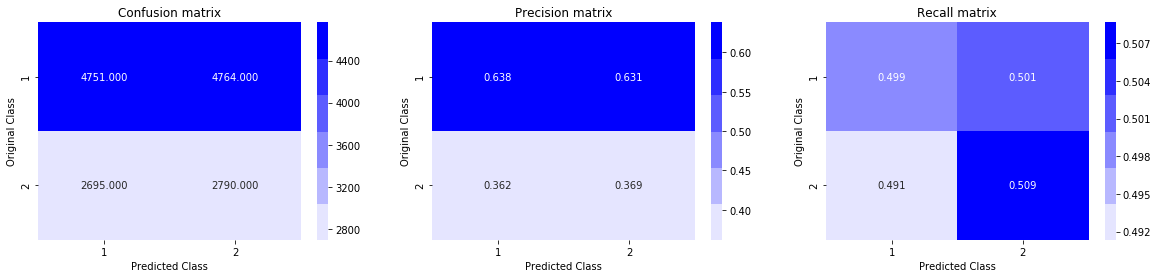

In [94]:

# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

## **4.4 Logistic Regression with hyperparameter tuning**

In [100]:
X_train.shape


(35000, 218)

In [101]:
y_train.shape

(35000,)

For values of alpha =  1e-05 The log loss is: 0.6566090638549226
For values of alpha =  0.0001 The log loss is: 0.46282757764906857
For values of alpha =  0.001 The log loss is: 0.4582093482540125
For values of alpha =  0.01 The log loss is: 0.46447902985541073
For values of alpha =  0.1 The log loss is: 0.4624134514936732
For values of alpha =  1 The log loss is: 0.4800881663721294
For values of alpha =  10 The log loss is: 0.5456862540078812


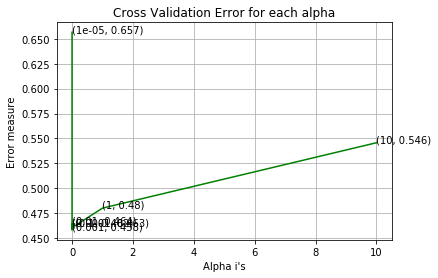

For values of best alpha =  0.001 The train log loss is: 0.45852190886180244
For values of best alpha =  0.001 The test log loss is: 0.4582093482540125
Total number of data points : 15000


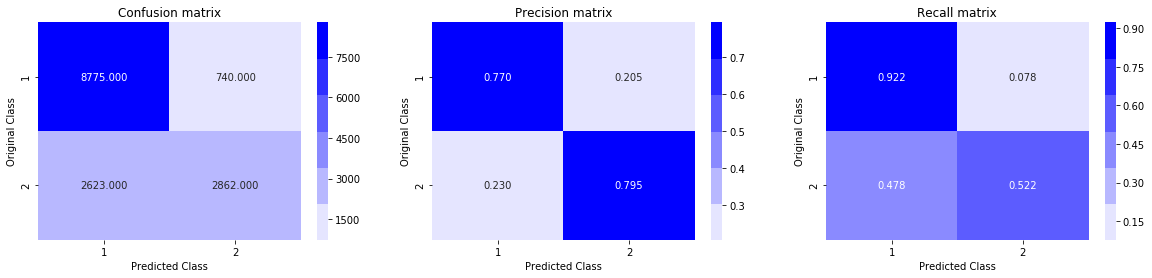

In [102]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# **4.5 Linear SVM with hyperparameter tuning**

For values of alpha =  1e-05 The log loss is: 0.6566090638549226
For values of alpha =  0.0001 The log loss is: 0.6566090638549226
For values of alpha =  0.001 The log loss is: 0.6566090638549226
For values of alpha =  0.01 The log loss is: 0.47878691435311777
For values of alpha =  0.1 The log loss is: 0.6067380711542735
For values of alpha =  1 The log loss is: 0.6566090638549226
For values of alpha =  10 The log loss is: 0.6566090638549226


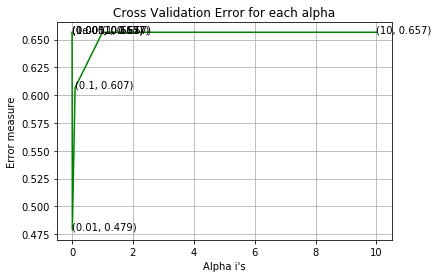

For values of best alpha =  0.01 The train log loss is: 0.481361200072133
For values of best alpha =  0.01 The test log loss is: 0.47878691435311777
Total number of data points : 15000


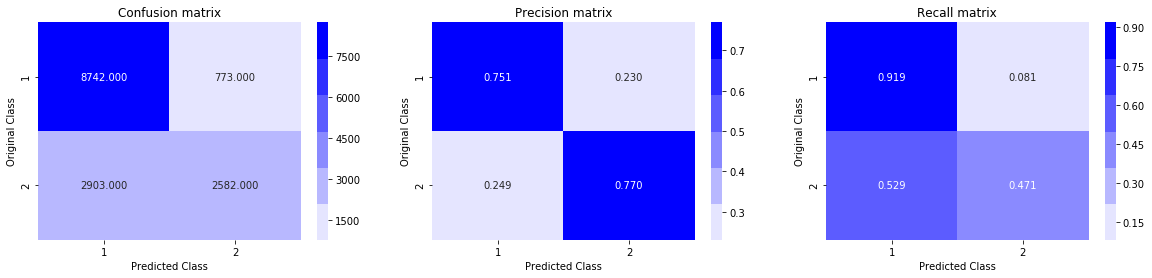

In [103]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)


# **4.6 XGBoost**

In [104]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684813	valid-logloss:0.684797
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.614146	valid-logloss:0.613868
[20]	train-logloss:0.562589	valid-logloss:0.562289
[30]	train-logloss:0.523792	valid-logloss:0.523596
[40]	train-logloss:0.493901	valid-logloss:0.493712
[50]	train-logloss:0.470976	valid-logloss:0.470748
[60]	train-logloss:0.452695	valid-logloss:0.452612
[70]	train-logloss:0.437978	valid-logloss:0.43811
[80]	train-logloss:0.426171	valid-logloss:0.4264
[90]	train-logloss:0.416517	valid-logloss:0.416963
[100]	train-logloss:0.408391	valid-logloss:0.40909
[110]	train-logloss:0.401568	valid-logloss:0.402425
[120]	train-logloss:0.395883	valid-logloss:0.397101
[130]	train-logloss:0.3909	valid-logloss:0.392345
[140]	train-logloss:0.386779	valid-logloss:0.388557
[150]	train-logloss:0.383015	valid-logloss:0.385034
[160]	train-logloss:0.379846	valid

Total number of data points : 15000


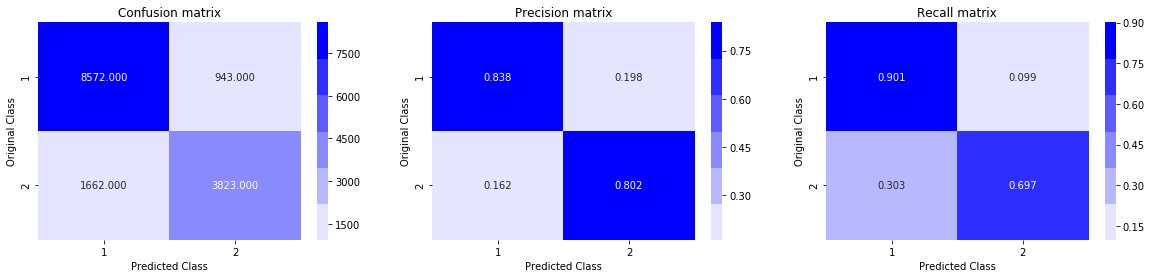

In [105]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# **Assignment5**

In [0]:

df4  = df1.merge(df3, on='id',how='left')

In [0]:
df4 = df4.sample(n=50000)

In [136]:

df4.shape

(50000, 35)

In [0]:
y_true = df4['is_duplicate_x']

In [138]:
y_true

209769    0
172461    1
210950    0
42507     1
4323      0
         ..
102866    0
83024     1
58195     0
48246     1
176026    1
Name: is_duplicate_x, Length: 50000, dtype: int64

In [139]:
df4 = df4.drop(['is_duplicate_x'],axis=1)
df4.shape

(50000, 34)

In [0]:
X_train,X_test, y_train, y_test = train_test_split(df4, y_true, stratify=y_true, test_size=0.3)

In [141]:
X_train.shape


(35000, 34)

In [142]:
X_test.shape

(15000, 34)

In [143]:
X_train.shape[0] + X_test.shape[0]

50000

In [144]:

# Filling the null values with ' '
X_train = X_train.fillna(' ')
nan_rows1 = X_train[X_train.isnull().any(1)]
print (nan_rows1)

# Filling the null values with ' '
X_test = X_test.fillna(' ')
nan_rows2 = X_test[X_test.isnull().any(1)]
print (nan_rows2)

Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+q2, freq_q1-q2]
Index: []
Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+q2, freq_q1-q2]
Index: []


In [145]:
X_train

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,qid1_y,qid2_y,question1_y,question2_y,is_duplicate_y,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
52725,52725,what are some of füssen own best kept secrets,what are some of michigan own best kept secrets,0.749981,0.749981,0.999980,0.999980,0.888879,0.888879,1.0,1.0,0.0,9.0,93,84,88,85,0.510638,93313,93314,What are some of Füssen's best kept secrets?,What are some of Michigan's best kept secrets?,0,6,1,44,46,8,8,7.0,16.0,0.437500,7,5
36098,36098,who is the biggest traitor in the history of c...,who is the biggest traitor in the history of a...,0.749981,0.749981,0.999980,0.999980,0.799992,0.799992,0.0,1.0,0.0,10.0,92,84,91,90,0.849057,65860,65861,Who is the biggest traitor in the history of C...,Who is the biggest traitor in the history of A...,0,1,2,52,55,10,10,8.0,18.0,0.444444,3,1
84725,84725,how many languages are spoken in brazil,how many languages are spoken in india,0.749981,0.749981,0.999967,0.999967,0.857131,0.857131,0.0,1.0,0.0,7.0,91,83,88,87,0.825000,143207,143208,How many languages are spoken in Brazil?,How many languages are spoken in India?,0,1,4,40,39,7,7,6.0,14.0,0.428571,5,3
169818,169818,which is the best part about learning ruby on ...,what is the hardest part about learning ruby o...,0.799984,0.799984,0.799984,0.799984,0.799992,0.799992,1.0,0.0,0.0,10.0,90,90,90,88,0.716981,262696,262697,Which is the best part about learning Ruby on ...,What is the hardest part about learning Ruby o...,0,1,1,52,54,10,10,8.0,20.0,0.400000,2,0
120820,120820,i graduated should i undergo post graduation o...,who are you and how are you doing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,22.0,19.0,25,29,25,47,0.085714,119714,195911,I graduated should I undergo post graduation o...,Who are you and how are you doing?,0,2,1,149,34,28,8,0.0,31.0,0.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278237,278237,what is larry david up to these days,what is the probable myers briggs type of larr...,0.666644,0.249997,0.399992,0.333328,0.499994,0.285712,0.0,1.0,6.0,11.0,69,53,51,62,0.342105,397474,397475,What is Larry David up to these days?,What is the probable Myers-Briggs type of Larr...,0,1,1,37,78,8,13,4.0,21.0,0.190476,2,0
43471,43471,what is the conspiracy behind chief minister j...,what are some biggest controversy about jayala...,0.499988,0.333328,0.499988,0.399992,0.444440,0.399996,1.0,1.0,1.0,9.5,66,63,61,58,0.365079,52097,78189,What is the conspiracy behind Chief Minister J...,What are some biggest controversy about Jayala...,1,4,1,65,60,9,8,3.0,17.0,0.176471,5,3
217095,217095,what are some best ayurvedic health tips,what are the best ayurvedic health tips that w...,0.999975,0.799984,0.666644,0.333328,0.857131,0.545450,0.0,1.0,4.0,9.0,93,79,75,93,0.690476,323384,323385,What are some best ayurvedic health tips?,What are the Best Ayurvedic Health tips that w...,0,1,1,41,60,7,11,5.0,18.0,0.277778,2,0
201947,201947,what are a few top cyber security companies in...,amongst the top colleges in india for commerce...,0.399992,0.142856,0.399992,0.199998,0.399996,0.148148,0.0,0.0,17.0,18.5,47,42,34,47,0.222222,304091,304092,What are a few top cyber security companies in...,Amongst the top colleges in India for Commerce...,0,1,1,53,146,10,27,3.0,34.0,0.088235,2,0


In [146]:
X_test

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,qid1_y,qid2_y,question1_y,question2_y,is_duplicate_y,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
221288,221288,are there any companies like universal yums in...,which company powers most of the online univer...,0.199996,0.111110,0.499988,0.222220,0.333330,0.124999,0.0,0.0,15.0,16.5,51,42,38,60,0.203704,328598,328599,Are there any companies like Universal Yums in...,Which company powers most of the online univer...,0,1,1,53,143,9,24,3.0,29.0,0.103448,2,0
198131,198131,how many rows and columns in one excel sheet,how many rows are there in excel sheet,0.999975,0.666656,0.666644,0.499988,0.749991,0.666659,1.0,1.0,1.0,8.5,85,73,76,67,0.375000,151844,299263,How many rows and columns in one excel sheet?,How many rows are there in excel sheet?,1,5,1,45,39,9,8,6.0,17.0,0.352941,6,4
149480,149480,when should i study for the sat,how can i get a high score in the sat what ki...,0.499975,0.124998,0.399992,0.249997,0.428565,0.176470,0.0,0.0,10.0,12.0,46,45,37,50,0.272727,235452,235453,When should I study for the SAT?,How can I get a high score in the SAT? What ki...,0,2,1,32,74,7,17,3.0,23.0,0.130435,3,1
311431,311431,which are the best movies in the world,what are the best movies of all time,0.666644,0.666644,0.499988,0.399992,0.499994,0.499994,0.0,0.0,0.0,8.0,72,68,70,73,0.552632,55350,21840,Which are the best movies in the world?,What are the best movies of all time?,1,10,38,39,37,8,8,4.0,15.0,0.266667,48,28
289957,289957,what are some alternatives to library nu,what are some free dating web sites in india,0.000000,0.000000,0.749981,0.749981,0.428565,0.333330,0.0,1.0,2.0,8.0,57,55,60,61,0.333333,411158,411159,What are some alternatives to library.nu?,What are some free dating web sites in India?,0,2,1,41,45,6,9,3.0,15.0,0.200000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34643,34643,what is the difference between tomato sauce an...,how can you make tomato sauce using puree,0.499988,0.399992,0.000000,0.000000,0.249997,0.199998,0.0,0.0,2.0,9.0,54,47,43,48,0.325581,63445,63446,What is the difference between tomato sauce an...,How can you make tomato sauce using puree?,0,1,1,63,42,10,8,2.0,17.0,0.117647,2,0
395096,395096,a guy told me that he had a crush on me but w...,i liked a guy since past 6 years but i told hi...,0.399996,0.166666,0.722218,0.541664,0.499999,0.283333,1.0,0.0,26.0,47.0,71,52,46,49,0.149660,276330,528044,"A guy told me that he had a crush on me, but w...",I liked a guy since past 6 years but i told hi...,0,1,1,146,294,34,60,17.0,77.0,0.220779,2,0
167801,167801,why did jeremy m thompson own account get dea...,what happened to jeremy m thompson,0.666644,0.399992,0.333322,0.249994,0.499992,0.333330,0.0,0.0,3.0,7.5,67,57,52,67,0.540541,114696,111341,Why did Jeremy M. Thompson's account get deact...,What happened to Jeremy M. Thompson?,1,2,1,53,36,8,6,2.0,14.0,0.142857,3,1
216418,216418,what is the best book you read in 2016,what are the best books you read in 2016,0.749981,0.749981,0.799984,0.799984,0.777769,0.777769,1.0,1.0,0.0,9.0,92,90,92,90,0.450000,172911,97309,What is the best book you read in 2016?,What are the best books you read in 2016?,1,4,3,39,41,9,9,7.0,18.0,0.388889,7,1


## **Tfidf vectorization on train data**

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
questions_train = list(X_train['question1_x']) + list(X_train['question2_x'])
vectorizer_tfidf_ques = TfidfVectorizer(lowercase=False,min_df=10)
vectorizer_tfidf_ques.fit(questions_train)

q1_tfidf_train = vectorizer_tfidf_ques.transform(X_train['question1_x'])
q2_tfidf_train = vectorizer_tfidf_ques.transform(X_train['question2_x'])
print("Shape of matrix after q1_tfidf_train ",q1_tfidf_train.shape)
print("Shape of matrix after q2_tfidf_train ",q2_tfidf_train.shape)

Shape of matrix after q1_tfidf_train  (35000, 5227)
Shape of matrix after q2_tfidf_train  (35000, 5227)


In [0]:
X_train = X_train.drop(['id','question1_x','question2_x','qid1_y','qid2_y','question1_y','question2_y','is_duplicate_y'],axis=1)

In [0]:
X_train = hstack((X_train,q1_tfidf_train,q2_tfidf_train))

In [150]:

X_train

<35000x10480 sparse matrix of type '<class 'numpy.float64'>'
	with 1475138 stored elements in COOrdinate format>

## **Preparing test data matrix**

**Tfidf vectorization on test data**

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

q1_tfidf_test = vectorizer_tfidf_ques.transform(X_test['question1_x'])
q2_tfidf_test = vectorizer_tfidf_ques.transform(X_test['question2_x'])
print("Shape of matrix after q1_tfidf_test ",q1_tfidf_test.shape)
print("Shape of matrix after q2_tfidf_test ",q2_tfidf_test.shape)

Shape of matrix after q1_tfidf_test  (15000, 5227)
Shape of matrix after q2_tfidf_test  (15000, 5227)


In [0]:
X_test = X_test.drop(['id','question1_x','question2_x','qid1_y','qid2_y','question1_y','question2_y','is_duplicate_y'],axis=1)

In [0]:
X_test = hstack((X_test,q1_tfidf_test,q2_tfidf_test))

In [154]:
X_test

<15000x10480 sparse matrix of type '<class 'numpy.float64'>'
	with 629204 stored elements in COOrdinate format>

# **Logistic Regression with hyperparameter tuning**

In [155]:
X_train.shape

(35000, 10480)

In [156]:
y_train.shape

(35000,)

For values of alpha =  1e-05 The log loss is: 0.4292863211564614
For values of alpha =  0.0001 The log loss is: 0.4278361504950536
For values of alpha =  0.001 The log loss is: 0.42188844793431635
For values of alpha =  0.01 The log loss is: 0.4417576497735069
For values of alpha =  0.1 The log loss is: 0.461250243268593
For values of alpha =  1 The log loss is: 0.49218256387628984
For values of alpha =  10 The log loss is: 0.5456961276629486


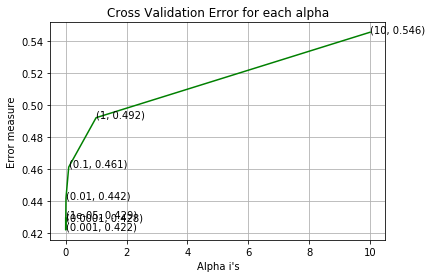

For values of best alpha =  0.001 The train log loss is: 0.4225363688279125
For values of best alpha =  0.001 The test log loss is: 0.42188844793431635
Total number of data points : 15000


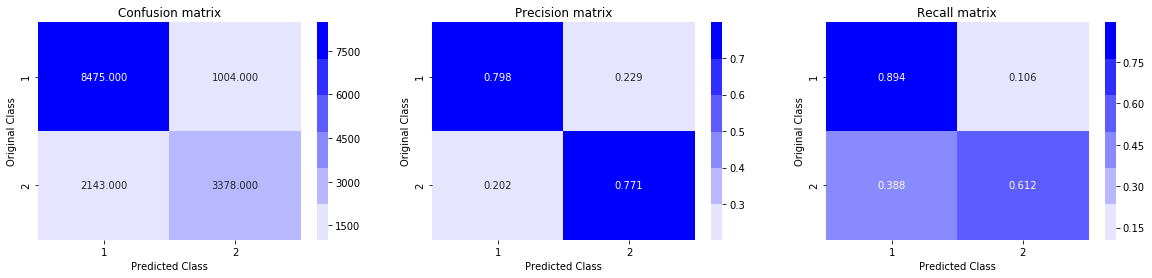

In [157]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## **Linear SVM with hyperparameter tuning**

For values of alpha =  1e-05 The log loss is: 0.43911539093652124
For values of alpha =  0.0001 The log loss is: 0.4530913954915855
For values of alpha =  0.001 The log loss is: 0.49465180478410015
For values of alpha =  0.01 The log loss is: 0.5140414806464756
For values of alpha =  0.1 The log loss is: 0.47541562126924625
For values of alpha =  1 The log loss is: 0.5647589676443299
For values of alpha =  10 The log loss is: 0.6096270669295057


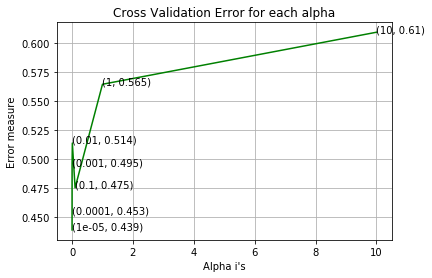

For values of best alpha =  1e-05 The train log loss is: 0.429289006879638
For values of best alpha =  1e-05 The test log loss is: 0.43911539093652124
Total number of data points : 15000


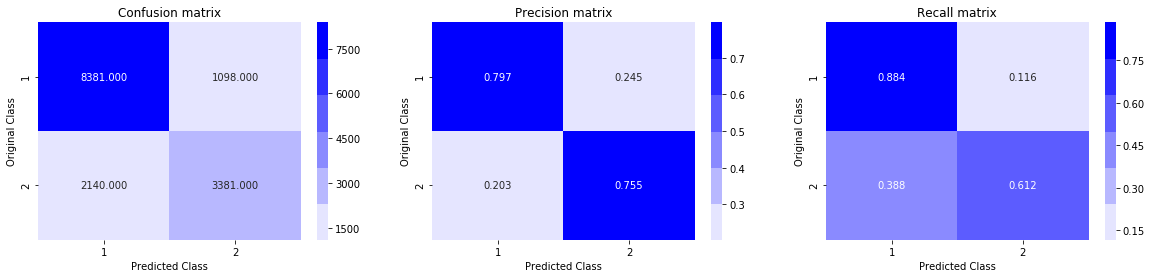

In [158]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42,class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)


## **4.6 XGBoost**

In [159]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
params = {      
    'max_depth': [3, 4, 5, 6, 7, 8],       
    'eta' : [0.01, 0.02, 0.05, 0.1]   
}

xgb = xgb.XGBClassifier()
random_search = RandomizedSearchCV(xgb, param_distributions=params, scoring='neg_log_loss', n_jobs=-1, verbose=10, random_state=42 ,return_train_score=True) 
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  50 | elapsed:   24.2s remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  13 out of  50 | elapsed:   30.3s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:   30.5s remaining:   49.7s
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:   35.3s remaining:   35.3s
[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed:   41.5s remaining:   25.4s
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:   44.5s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:   48.1s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   59.1s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid=

In [160]:
print('Best hyperparameters:')
print(random_search.best_params_)

Best hyperparameters:
{'max_depth': 8, 'eta': 0.02}


In [161]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 8

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.682902	valid-logloss:0.683174
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.599334	valid-logloss:0.602195
[20]	train-logloss:0.538881	valid-logloss:0.544762
[30]	train-logloss:0.493414	valid-logloss:0.50215
[40]	train-logloss:0.458085	valid-logloss:0.469471
[50]	train-logloss:0.430857	valid-logloss:0.444462
[60]	train-logloss:0.409197	valid-logloss:0.425135
[70]	train-logloss:0.391929	valid-logloss:0.409844
[80]	train-logloss:0.378009	valid-logloss:0.397791
[90]	train-logloss:0.366622	valid-logloss:0.3884
[100]	train-logloss:0.35665	valid-logloss:0.380256
[110]	train-logloss:0.348096	valid-logloss:0.373692
[120]	train-logloss:0.340009	valid-logloss:0.368044
[130]	train-logloss:0.334151	valid-logloss:0.363798
[140]	train-logloss:0.329079	valid-logloss:0.360069
[150]	train-logloss:0.324212	valid-logloss:0.356979
[160]	train-logloss:0.320345	val

In [162]:
print("The test log loss is:",log_loss(y_test, predict_y, labels=random_search.classes_, eps=1e-15))

The test log loss is: 0.3372083058601517


Total number of data points : 15000


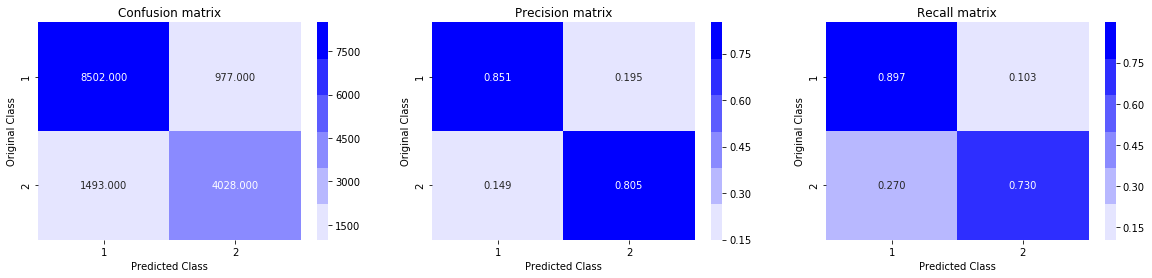

In [163]:

predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [164]:
from prettytable import PrettyTable
x = PrettyTable() 
x.field_names = ["Vectorizer", "Model", "Test log loss"] 
x.add_row(["TFIDF", "Random Model", 0.88])
x.add_row(["TFIDF_W2V", "Logistic Regression", 0.4582])
x.add_row(["TFIDF_W2VF", "Linear SVM", 0.4787]) 
x.add_row(["TFIDF_W2V", "XGBoost", 0.3528]) 
x.add_row(["TFIDF", "Logistic Regression", 0.4218])
x.add_row(["TFIDF", "Linear SVM", 0.4391]) 
x.add_row(["TFIDF", "XGBoost", 0.3372])
print(x)

+------------+---------------------+---------------+
| Vectorizer |        Model        | Test log loss |
+------------+---------------------+---------------+
|   TFIDF    |     Random Model    |      0.88     |
| TFIDF_W2V  | Logistic Regression |     0.4582    |
| TFIDF_W2VF |      Linear SVM     |     0.4787    |
| TFIDF_W2V  |       XGBoost       |     0.3528    |
|   TFIDF    | Logistic Regression |     0.4218    |
|   TFIDF    |      Linear SVM     |     0.4391    |
|   TFIDF    |       XGBoost       |     0.3372    |
+------------+---------------------+---------------+



# **STEP BY STEP PROCEDURE:**

1.As we know, we have a data set containing Number of rows 404,290, containing 5 columns: qid1, qid2, question1, question2, is duplicate from which ' is duplicate ' is a class label specifying that Question 1 and Question 2 are similar or not, and this is a binary classification problem, and we need to predict whether or not they are duplicate.

2.Firstly we preprocessed our data,did feature engineering to create new features which might help us and created our dataframes, then we merged dataframes and got out final matrix.Now after doing simple EDA on dataset we will try some Basic Feature Extraction (before cleaning) the datset like Frequency of qid1's ,word_Common and etc. and using this featured datset we will do some EDA on it so that we will able to rectify which features are most useful features our of all features i.e(wich feature is helpful for classification)

3.We will try some Advanced Feature Extraction using NLP and Fuzzy Features after doing basic Basic Feature Extractions, but before we do this we will do Text Preprocessing and then we will do Advanced Feature Extraction and try to show our Advanced Feature using EDA, PCA and word clouds.

4.Then we randomly split data. We could also have splitted time-based, as the model could also forecast unknown information for the future. But, no timestamp column was provided, so the only option was to randomly split it.

5.Now that we know we have columns of two questions i.e. Question 1 and Question 2 and we will vector that col using tfidf weighted word-vectors so that we can apply models on it and after doing all these we will merge all the features i.e. besic features + advance features + Question 1 tfidf w2v + and Question 2 tfidf w2v together. And now we're going to apply models to it after doing all of it.

6.In this case study, as we know, we use two main performance matrix, i.e. log-loss and confusion matrix, and we'll get our performance of the models there.

7.Let's start: here's a model i.e. Logistic Regression linear svm and XgBoost and a random model where the worst-case log-loss is found and then we're trying to compare it.

8.In the next step we will test our models with other vectorizers i.e. tfidf instead of tfidf weighted w2v and seek some hyperparameter tuning to improve the performance of the model.

9.We used a simple Random / Dumb model now. It gave 0.88 log loss. That's the worst log-loss scenario. This will serve as a foundation and any system that we build should have a lower log-loss than this dumb model.

10.After that we have applied Logistic Regression with hyperparameter tuning. It gave a log-loss of 0.38, which is lower than Random Model. We can also see that there is no Overfitting problem , since, Train log-loss and Test log-loss and very close.

11.After that we have applied Linear SVM with hyperparameter tuning. It gave the log-loss of 0.41,which is lower than Random Model. We can also see that there is no Overfitting problem , since, Train log-loss and Test log-loss and very close.

12.After that we have applied Xgboost with hyperparameter tuning. It gave the log-loss of 0.32,which is lower than Random Model. We can also see that there is no Overfitting problem , since, Train log-loss and Test log-loss and very close.

Looks like among all the models we tried Xgboost seems to be working well and can therefore be used to classify that questions on Quora are duplicates of questions that have already been asked.

# **references**

In [0]:
#https://www.appliedaicourse.com/course/11/Applied-Machine-learning-course
#https://github.com/dileepteja3/Quora-Case-Study/blob/master/dileep.teja3%40gmail.com_20.ipynb
#https://github.com/premvardhan/Quora-question-pair-similarity-